## Chapter 4: NumPy basics

### Diferencia entre `array` y `list`

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1_000_00)
my_list = list(range(1_000_00))

Comparar los tiempos:

In [3]:
%time my_arr2 = my_arr * 2

CPU times: total: 0 ns
Wall time: 1.11 ms


In [4]:
%time my_list2 = my_list * 2

CPU times: total: 0 ns
Wall time: 2.56 ms


### Indexación Booleana

In [5]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])

In [6]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [7]:
# indexación
data[names == "Bob"] # trae los valores en data cuando los valores en names igual a "Bob"

array([[4, 7],
       [0, 0]])

In [8]:
# todo menos "Bob"
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

`~` invierte una matriz booleana referenciada.

In [9]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [10]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

`~` puede ser usado para una matriz referenciada por una variable.

In [11]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

### Operadores and `&` y or `|`

In [12]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [13]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

Sustituir el valor o valores en el lado derecho.

In [14]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [15]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

Indexación fancy.

In [16]:
arr = np.zeros((8, 4))

for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Seleccionar un subconjunto de filas en un orden en particular.

In [17]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Funciona diferente un array de dimensiones.

In [18]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [19]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] # dimensión, posición

array([ 4, 23, 29, 10])

Transposición y ejes de intercambio.

In [20]:
arr = np.arange(15).reshape((3, 5))

In [21]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [22]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Calcular el producto con `numpy.dot`.

In [23]:
arr = np.array([[1, 0, 1], [1, 2, -2], [6, 3, 2], [-1, 0, 1], [1, 0, 1]])
np.dot(arr.T, arr)

array([[40, 20, 11],
       [20, 13,  2],
       [11,  2, 11]])

In [24]:
# con @
arr.T @ arr

array([[40, 20, 11],
       [20, 13,  2],
       [11,  2, 11]])

Generar números psuedorandom.

In [25]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-0.80501944,  3.23327869, -1.24026177,  0.86118235],
       [-0.051102  ,  0.59163398,  0.92755469, -0.55560303],
       [-1.28685518, -0.16521235,  0.51452296, -0.86319133],
       [ 1.51878345, -0.95992697,  0.13053908,  0.98876643]])

Es más rápido que `random` de Python.

In [26]:
from random import normalvariate

N = 1_000_000

In [27]:
%time samples = [normalvariate for _ in range(N)]

CPU times: total: 93.8 ms
Wall time: 328 ms


In [28]:
%time np.random.standard_normal(N)

CPU times: total: 15.6 ms
Wall time: 59 ms


array([ 1.76811278, -1.78339594,  0.92691131, ..., -1.40853645,
        0.42275686,  0.723667  ])

In [29]:
# permite ser configurado con seed
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
type(rng)

numpy.random._generator.Generator

### Programación orientada a matrices con matrices

In [30]:
# evaluar la función sqrt(x^2 + y^2)
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)

In [31]:
# evaluar la función
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Ejemplo simple con `matplotlib`.

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Tuhabi\AppData\Local\Temp\ipykernel_13596\597463980.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plotof $\sqrt{x^2 + y^2} for a grid of values")


Text(0.5, 1.0, 'Image plotof $\\sqrt{x^2 + y^2} for a grid of values')

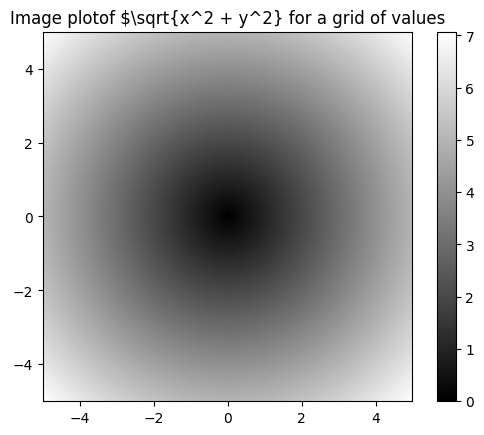

In [32]:
# descomentar
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plotof $\sqrt{x^2 + y^2} for a grid of values")
#text(0.5, 1.0, "Image plotof 4\sqrt{x^2 + y^2} for a grif of values")

In [33]:
# cerrar todas la ventanas en IPython
# plt.close("all")

### `np.where()`

In [34]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, False, False])

In [35]:
# tomar un valor de xarr si está en cond o tomar yarr. list comprehension
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 2.4, 2.5]

In [36]:
# con np.where()
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 2.4, 2.5])

>El segundo y tercer agumento en `numpy.where()` no es necesario que sean matrices;
una o ambas pueden ser escalares.

    Una acción muy común en análisis de datos es producir una nueva matriz de valores
    basados en otra matriz.

In [37]:
arr = rng.standard_normal((4, 4))
arr > 0

array([[False,  True,  True, False],
       [ True,  True, False,  True],
       [False, False,  True, False],
       [ True,  True,  True, False]])

In [38]:
new = np.where(arr > 0, 2, -2)
new

array([[-2,  2,  2, -2],
       [ 2,  2, -2,  2],
       [-2, -2,  2, -2],
       [ 2,  2,  2, -2]])

In [39]:
# puede combinar escalares o matrices
np.where(arr > 0, 2, arr)

array([[-1.3677927 ,  2.        ,  2.        , -1.95286306],
       [ 2.        ,  2.        , -0.75938718,  2.        ],
       [-0.46695317, -0.06068952,  2.        , -1.25666813],
       [ 2.        ,  2.        ,  2.        , -0.29969852]])

### Métodos matemáticos y estadísticos
Generar algunos datos aleatorios normalmente distribuidos y calcular algunas estadísticas agregadas.

In [40]:
arr = rng.standard_normal((5, 4))
arr.mean() # or np.mean(arr)

0.018063390847970272

In [41]:
arr.sum()

0.36126781695940546

In [42]:
arr.mean(axis=1) # columnas

array([-0.10684218,  0.72940267, -0.14059552, -0.19439153, -0.1972565 ])

In [43]:
arr.mean(axis=0) # filas

array([-0.46085748, -0.01510651,  0.33448093,  0.21373661])

In [44]:
# métodos para matrices booleanas
arr = rng.standard_normal(100)
(arr > 0).sum()

52

In [45]:
(arr <= 0).sum()

48

In [46]:
# lógica única
names = np.array(["Bob", "Will", "Bob", "Will", "Joe", "Joe"])
np.unique(names) # retorna únicos

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [47]:
inst = np.array([3, 3, 3, 2])
np.unique(inst)

array([2, 3])

### Entrada y salida de archivos con `arrays`
`numpy.save` y `numpy.load` sirven para cargar y guardar archivos.

In [48]:
arr = np.arange(10)
np.save("some_arrays", arr) # el archivo se guarda como .npy

In [49]:
# guardar varias matrices en un archivo sin comprimir
np.savez("some_arr", a=arr, b=arr) # se guarda como .npz

In [50]:
# cargar un archivo
arch = np.load("some_arr.npz")

In [51]:
# se accede a cada array como un diccionario
arch["a"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Álgebra líneal

In [52]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [53]:
# es equivalente a
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [54]:
# or
x @ np.ones(3)

array([ 6., 15.])

In [55]:
# ejemplo: pasos aleatorios
import random

position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

walk
# plt.plot(walk[:100])

[0,
 -1,
 0,
 -1,
 -2,
 -1,
 0,
 1,
 0,
 1,
 0,
 -1,
 0,
 -1,
 -2,
 -1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -3,
 -4,
 -3,
 -2,
 -3,
 -4,
 -5,
 -6,
 -5,
 -4,
 -5,
 -4,
 -5,
 -4,
 -5,
 -6,
 -7,
 -6,
 -7,
 -8,
 -7,
 -6,
 -7,
 -8,
 -7,
 -8,
 -9,
 -10,
 -9,
 -8,
 -9,
 -8,
 -9,
 -10,
 -9,
 -10,
 -11,
 -10,
 -11,
 -12,
 -11,
 -10,
 -9,
 -10,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -7,
 -6,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -3,
 -4,
 -3,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -3,
 -4,
 -5,
 -4,
 -3,
 -4,
 -3,
 -2,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 1,
 0,
 -1,
 -2,
 -3,
 -4,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 -1,
 0,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -5,
 -4,
 -5,
 -4,
 -3,
 -2,
 -3,
 -2,
 -3,
 -4,
 -5,
 -6,
 -7,
 -8,
 -9,
 -8,
 -7,
 -6,
 -7,
 -6,
 -5,
 -6,
 -5,
 -4,
 -3,
 -2,
 -3,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -3,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 1,


In [56]:
# con numpy.random
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.sum()
walk.min()
walk.max()
(np.abs(walk) >= 10).argmax()

0

In [57]:
# calcular 5000
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [58]:
walks.min()

-120

In [59]:
walks.max()

114

In [60]:
# calcular el timepo mínimo de cruce
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30.sum()

3395

In [61]:
# usar una matriz booleana para seleccionar filas de walks que realmente cruzan
# el nivel absoluto 30
crossing_time = (np.abs(walks[hits30]) >= 30)
crossing_time

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [62]:
# calcular el tiempo mínimo de cruce promedio
crossing_time.mean()

0.26289131075110456

In [63]:
# other example
draws = 25 * rng.standard_normal((nwalks, nsteps))
draws

array([[ -4.04973719, -72.20301454, -25.77413767, ...,  42.35575067,
        -67.30300634, -41.96801803],
       [ -4.38418762, -35.37572912,  27.86067612, ...,   1.10017609,
         -0.52777227,  -8.29750679],
       [ 35.22741721, -35.3831178 ,   9.81831178, ...,  -2.72558913,
         -4.00785341,  -9.84970338],
       ...,
       [ 22.45520194, -12.52067344,  -2.43556491, ..., -19.43720862,
        -20.66675401,  16.5086757 ],
       [ -4.54478268,  25.40093023, -29.81380022, ...,  46.78530024,
          3.52993084, -18.92648078],
       [-10.79061221, -11.28233177,  -5.78813154, ...,  11.78367805,
         -3.0529469 ,  18.25963448]])